# Terminus Position 
This script uses the CSV output from MaQiT, provided within the 'terminus_position_maqit' data folder. As described in the README file, MaQiT was used to calculate terminus position change using the curvilinear box method. Terminus positions were manually digitised between 2022 and 2023 from SAR imagery, for the purposes of this study. Those provided between 2018 and 2022 were downloaded from the MEaSUREs Weekly to Monthly Greenland Outlet Glacier Terminus Positions from Sentinel-1 Mosaics (2018-2022; https://nsidc.org/data/nsidc-0781/versions/1). 

In [1]:
# IMPORT MODULES
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np 
import datetime

# OPEN THE MAQIT CSV FILE, IGNORING THE FIRST LINE WHICH SIMPLY STATES THE METHOD USED (e.g. CURVILINEAR BOX METHOD)
# COMBINE YEAR, MONTH AND DAY COLUMNS TO A 'DATE' COLUMN.
MAQIT_CSV = pd.read_csv(r"R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/terminus_position_maqit/MaQiT_output_2018_2023.csv", skiprows=1, parse_dates= {"Date" : ["Year","Month","Day"]})

# SORT THE DATAFRAME IN ASCENDING DATE ORDER, PRINTING THE FIRST AND LAST DATES.
MAQIT_CSV.sort_values(by='Date', ascending = True, inplace = True) 
first_date = MAQIT_CSV['Date'][0]
last_date = MAQIT_CSV['Date'].iloc[-1]
first_date_label = first_date.strftime('%d/%m/%Y') 
last_date_label = last_date.strftime('%d/%m/%Y') 
print('The first date in the dataframe is:', first_date_label)
print('The last date in the dataframe is:', last_date_label)

The first date in the dataframe is: 05/01/2018
The last date in the dataframe is: 28/12/2022


In [2]:
# CREATE A NEW COLUMN 'TP_RELATIVE_TO_FIRST_DATE' AND CALCULATE.
MAQIT_CSV['TP_RELATIVE_TO_FIRST_DATE'] = MAQIT_CSV['Terminus position relative to most recent observation (m)'].iloc[0] - MAQIT_CSV['Terminus position relative to most recent observation (m)']

# EXTRACT AND PRINT THE MINIMUM AND MAXIMUM CHANGE IN TP RELATIVE TO THE FIRST DATE. 
min_TP_position = MAQIT_CSV['TP_RELATIVE_TO_FIRST_DATE'].min()
max_TP_position = MAQIT_CSV['TP_RELATIVE_TO_FIRST_DATE'].max()

print('The minimum terminus position, relative to the first observation, is', min_TP_position)
print('The maximum terminus position, relative to the first observation, is +', max_TP_position)

The minimum terminus position, relative to the first observation, is -4444.8
The maximum terminus position, relative to the first observation, is + 2447.7


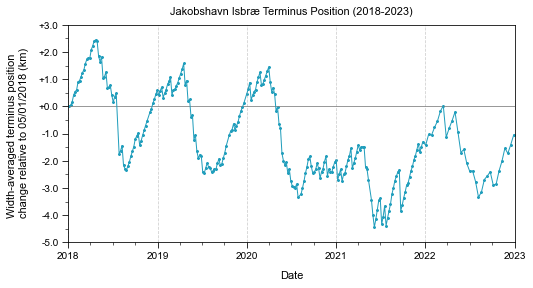

In [3]:
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) # Add a horizontal line at 0.
plt.title('Jakobshavn Isbræ Terminus Position (2018-2023)', pad=10, fontsize=11)
plt.ylabel(f"Width-averaged terminus position \n change relative to {first_date_label} (km)", labelpad=10, fontsize=11)
plt.xlabel('Date', labelpad=10, fontsize=11)
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.scatter(MAQIT_CSV['Date'], MAQIT_CSV['TP_RELATIVE_TO_FIRST_DATE']/1000, color='#219ebc', s=4, marker='x')
plt.plot(MAQIT_CSV['Date'], MAQIT_CSV['TP_RELATIVE_TO_FIRST_DATE']/1000, color='#219ebc', linewidth=1)

# FORMAT THE X-AXIS TICK LIMITS  
min_x_value = datetime.datetime.strptime('2018-01-01', '%Y-%m-%d')
max_x_value = datetime.datetime.strptime('2023-01-01', '%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
ax.tick_params(axis='both', which='both', length=6)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# FORMAT THE Y-AXIS TICK LIMITS  
min_y_value = -5
max_y_value = 3
interval_y = 1

def format_y_ticks(y, pos):
    if y >= 0:
        return f'+{y:.1f}'  # Add a '+' sign for non-negative values
    else:
        return f'{y:.1f}'

ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_y_ticks))
plt.ylim(bottom=min_y_value, top=max_y_value)
plt.yticks(np.arange(min_y_value, max_y_value+0.1, interval_y))
minor_locator = ticker.MultipleLocator(base=0.5)
ax.yaxis.set_minor_locator(minor_locator)

# ADJUST THE HEIGHT OF THE MINOR TICKS
ax.tick_params(axis='x', which='minor', length=3)
ax.tick_params(axis='y', which='minor', length=3)
plt.show()